## 12. 회귀분석
### - 단순회귀모형
### - 중회귀모형
### - 모형의 선택
### - 모형의 타당성

* 회귀분석에 의해 변수 사이의 인과관계가 명확해지고 한 변수가 다른 변수에 끼치는 영향을 추정할 수 있음
* 모형 $\rightarrow$ 현실 세계에서 발생하는 복잡한 현상의 특징을 잘 포착하여 단순화한 것
* 회귀분석의 목적 $\rightarrow$ 복잡한 현상을 사람이 이해할 수 있을 정도의 간단한 구조로 충분히 설명할 수 있는 모형을 찾는 것이 목적

In [1]:
# 기존에 사용했던 라이브러리에 statsmodels를 추가
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
# 시용할 데이터 불러오기
df = pd.read_csv(r'E:\jupyter\누구나 파이썬 통계분석\ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


#### 1. 단순회귀모형
* 회귀분석(regression analysis) $\rightarrow$ 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
  - 원인이 되는 변수 $\rightarrow$ 설명변수(explanatory variable) (= 독립변수; independent variable)
  - 결과가 되는 변수 $\rightarrow$ 반응변수(response variable) (= 종속변수; dependent variable)
* 단순회귀모형(simple regression model) $\rightarrow$ 설명변수와 반응변수가 1개씩인 가장 단순한 모델
* 회귀분석에서의 가설
  - $y = {\beta_0} + {\beta_1{x}}$를 가정
  - 그러나 데이터는 직선과 완전히 일치하지는 않음
  - 기본적인 관계는 직선상에 있다고 생각하고, 다른 요인에 관해서는 예측할 수 없는 확률적인 것이라고 생각
  - 예측할 수 없는 부분을 오차항(error term)이라고 함 $\rightarrow$ $\epsilon_i$
  - 다시... $Y_i = {\beta_0} + {\beta_1{x}} + \epsilon_i$  $(i=1,2,\dots,n)$
  - 회귀분석에서는 추가적으로 두 가지를 가정
    + 설명변수가 확률변수는 아니다
    + $\epsilon_i$는 서로 독립이고 $N(0,\sigma^2)$을 따른다
  - 위 가정에 의해 확률변수 $Y_i$는 서로 독립이고 $N({\beta_0} + {\beta_1}{x_i}, \sigma^2$을 따르는 것을 알 수 있음
  - 회귀분석은 이러한 가정을 기초로 표본인 $(x_1,Y_1),(x_2,Y_2),\dots,(x_n,Y_n)$으로부터 모수 $\beta_0$과 $\beta_1$을 추정함
  - 회귀직선(regression line): $\beta_0$과 $\beta_1$의 추정값 $\hat{\beta_0}$과 $\hat{\beta_1}$에 의해 생성되는 직선 $\rightarrow$ $y = \hat{\beta_0} + \hat{\beta_1}{x}$ 
  - $\hat{\beta_0}$과 $\hat{\beta_1}$은 회귀계수(regression coefficient)라고 함
* statsmodels에 의한 회귀분석
  - smf.ols 함수를 활용하여 설명변수와 반응변수의 관계를 나타낸 문자열과 DataFrame을 전달하고, 추가로 fit 메서드를 호출하여 실행할 수 있음
    + OLS = 최소제곱법(Ordinary Least Squares)
* 회귀계수
  - 점추정
    + 추정값이 생성한 직선 $y = \hat{\beta_0} + \hat{\beta_1}{x}$, 즉 회귀직선은 데이터 $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$에 가장 잘 들어맞는 직선
    + '데이터에 가장 잘 들어맞는 직선' $\rightarrow$ $x_i$로부터 예측된 모형의 예측값(predicted value) $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$와 실제의 데이터 $y_i$의 차이가 가장 작은 직선
    + 엄밀하게는 $y_i - \hat{y_i}$의 차이를 잔차(residual), 그 제곱합인 잔차제곱합(residual sum of squares; RSS) $\sum_i^n{\hat{\epsilon^2}}$이 더욱 작은 직선으로서 정의
    + 잔차제곱합을 최소화하는 $\hat{\beta_0}$과 $\hat{\beta_1}$을 구하는 방법을 최소제곱법이라고 함
    + 최소제곱법으로 구한 $\hat{\beta_0}$과 $\hat{\beta_1}$은 $\beta_0$과 $\beta_1$의 불편일치추정량이 됨
  - 구간추정
    + $\beta_0$과 $\beta_1$의 구간추정 $\rightarrow$ $\hat{\beta_0}$과 $\hat{\beta_1}$의 표준오차가 필요
    + $\hat{\beta_0}$과 $\hat{\beta_1}$의 표준오차를 구하는 것은 복잡함
    + 결과만 기록하면 각각 $\sqrt{{C_0}{\hat{\sigma^2}}}$과 $\sqrt{{C_1}{\hat{\sigma^2}}}$이 됨
    + 다만 $(XX^T)^{-1}$의 대각성분의 첫 번째가 $C_0$, 두 번째가 $C_1$이 됨
  - t검정
    + 회귀계수에 대한 가설검정
    + 귀무가설: $\beta_1 = 0$
    + 대립가설: $\beta_1 \neq 0$
    + $\beta_1$에 대해서도 동일한 가설검정을 고려하겠지만, $\beta_1$에 대한 가설검정에는 중요한 의미가 있음
    + $\beta_1 = 0$인 경우, $y_i = {\beta_0} + 0 \times x_i + {\epsilon_i} = \beta_0 + {\epsilon_i}$
    + 위와 같을 때, 설명변수가 반응변수에 전혀 영향을 끼치지 않는 모형이 되므로, 귀무가설이 기각되어 $\beta_1 \neq 0$이라는 결론을 얻게 됨
    + 따라서 설명변수가 반응변수에 영향을 끼치지 않는다고 주장할 수 있게 됨
    + 이 가설검정의 검정통계량은 $t = {{\hat{\beta_1} - \beta_1} \over {\sqrt{{\sigma^2}C_1}}}$
    + t도 역시 잔차의 제약으로부터 자유도가 n-2인 t분포를 따른다. 더 나아가 귀무가설은 $\beta_1 = 0$이므로 $t = {{\hat{\beta_1}} \over {\sqrt{{\sigma^2}C_1}}}$

In [3]:
# 쪽지시험의 평균 점수: 설명변수, 기말고사 점수: 반응변수
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

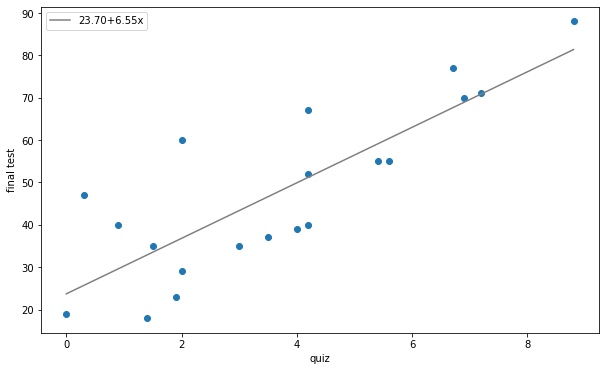

In [4]:
# 산점도와 회귀직선 그리기
poly_fit = np.polyfit(x,y,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [5]:
# OLS
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.59e-06
Time:                        20:15:55   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 각 행은 다음에 관한 분석 결과
  - Intercept: 절편 $\beta_0$
  - quiz: 기울기 $\beta_1$
* 각 열은 다음을 나타냄
  - coef: 회귀계수의 추정값
  - std err: 추정값의 표준차
  - t: 회귀계수에 관한 t검정통계량
  - P>$\left\lvert{t}\right\rvert$: 검정통계량의 p값
  - [0.025와 0.975]: 회귀계수의 95% 신뢰구간

In [6]:
# 최소제곱법으로 추정량 구하기
# 선형대수학이나 편미분에 관한 지식이 필요한 부분
# 하지만 Numpy로 간단하게 구현
X = np.array([np.ones_like(x),x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
# 최소제곱법 -> np.linalg.lstsq
# 첫 번째 인수가 설명변수인 X, 두 번째 인수가 반응변수인 y
# 첫 번째 반환값이 구하려는 추정량
beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]
beta0_hat, beta1_hat

<ipython-input-7-5a011dc8d4d5>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]


(23.699495346731226, 6.553732606043085)

In [8]:
# 예측값과 잔차 계산
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

* 잔차 $\hat{epsilon_i}$는 오차항 $\epsilon_i$에 대응하고 있기 때문에 잔차의 분산으로부터 모분산 $\sigma^2$을 추정할 수 있음
* 다만, 잔차의 자유도는 회귀계수의 수 $p+1$만큼 감소하여 $n-p-1$이 되므로, 모분산의 불편추정량 $\hat{\sigma^2}$은 $n-p-1$로 나누어 계산되는 값
* $\hat{\sigma^2} = {1 \over {n-p-1}}{\sum_i^n(\hat{\epsilon_i} - \bar{\hat{\epsilon}})^2} = {1 \over {n-p-1}}{\sum_i^n{\hat{\epsilon_i^2}}}$

In [9]:
# 이 경우 회귀계수의 수가 2이므로 자유도는 n-2
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290434734959

In [10]:
# C0, C1을 Numpy로 구할 수 있음
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
C0, C1

(0.16546420022873096, 0.008503003686052104)

In [11]:
# C0, C1을 활용하여 표준오차 계산할 수 있음
np.sqrt(s_var*C0), np.sqrt(s_var*C1)

(4.713837012645705, 1.0685841387335373)

* 회귀계수의 신뢰구간 \
  회귀계수 $\beta_0$, $\beta_1$의 신뢰수준 $100(1-\alpha)$%의 신뢰구간은 \
  $[{\hat{\beta_{i}}} - {t_{\alpha/2}}(n-2){\sqrt{\hat{\sigma^2}}C_i}, {\hat{\beta_{i}}} - {t_{1- \alpha/2}}(n-2){\sqrt{\hat{\sigma^2}}C_i}] (i=0,1)$ \
  으로 추정됨

In [12]:
# beta0_hat의 95% 신뢰구간 구하기
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.79609127276026, 33.602899420702194)

In [13]:
# beta1_hat의 95% 신뢰구간 구하기
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125893, 8.798744574960278)

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532023

In [15]:
# p깂
(1 - rv.cdf(t)) *2

8.590875866687497e-06

* 귀무가설은 기각되어, 쪽지 시험 평균 점수와 기말고사 점수 사이에는 인과관계가 있다고 말할 수 있음

In [16]:
# beta0에 대한 다음의 가설검정도 동일하게 수행
t = beta0_hat / np.sqrt(s_var * C0)
t

5.027644206440129

In [17]:
(1 - rv.cdf(t)) *2

8.745298393186829e-05

#### 2.중회귀모형(multiple regression model)
* 중회귀모형: 설명변수가 2개 이상인 모형
* $y = {\beta_0} + {{\beta_1}x_1} + \dots + {{\beta_p}x_p}$
  - ex) 기말고사라는 반응변수를 설명하기 위해 설명변수로 쪽지 시험 평균 점수와 시험 전날의 수면 시간을 설정 (이 때 p=2)
  - $Y = {\beta_0} + {{\beta_1}x_{i1}} + {{\beta_2}x_{i2}} + \epsilon_i$
* 가변수(dummy variable)
  - 질적 변수를 어떻게 처리해야할지 생각해볼 필요성 있음
  - 질적변수를 변환하여 양적변수와 동일하게 취급할 수 있게 하는 기법을 도입하면 좋을 듯 $\rightarrow$ 가변수
  - 가변수는 0과 1을 취하는 2진 변수로, 변환하고 싶은 질적변수의 카테고리 수에서 하나를 줄인 수만큼 필요
  - ex) 통학방법이 '버스','자전거','도보' 세 가지일 때, 가변수를 $x_도보, x_자전거$라고 설정할 수 있음
  - 이 가변수에 의해 도보를 $({{x_도보} = 1}, {{x_자전거} = 0})$, 자전거를 $({{x_도보} = 0}, {{x_자전거} = 1})$, 버스를 $({{x_도보} = 0}, {{x_자전거} = 0})$으로 나타낼 수 있음
  - 회귀모형은 $Y_i = {\beta_0} + {{\beta_1}x_{i1}} + {{\beta_2}x_{i2}} + {{\beta_3}x_{i도보}} + {{\beta_4}x_{i자전거}} + {\epsilon_i}$가 됨

In [18]:
# statsmodels로 회귀분석 수행
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           6.19e-06
Time:                        20:15:55   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# 중회귀모형의 회귀계수 -> Numpy
x1 = df['quiz']
x2 = df['sleep_time']

y = df['final_test']
p = 2

* $\beta_0,\beta_1,\beta_2$의 추정값인 $\hat{\beta_0},\hat{\beta_1},\hat{\beta_2}$을 구하기
* 단순회귀모형의 경우와 마찬가지로 첫 번째 열은 전부 1, 두 번째 열은 x1, 세 번째 열은 x2가 되는 행렬 X를 생성하고, 최소제곱법을 실행함으로써 구할 수 있음

In [20]:
X = np.array([np.ones_like(x1),x1,x2]).T
beta0_hat, bta1_hat, beta2_hat = np.linalg.lstsq(X,y)[0]
beta0_hat, beta1_hat, beta2_hat

<ipython-input-20-ac660600ab5e>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, bta1_hat, beta2_hat = np.linalg.lstsq(X,y)[0]


(-1.8709143470996081, 6.553732606043085, 4.191706546398686)

* $\hat{\beta_0},\hat{\beta_1},\hat{\beta_2}$을 활용하여 예측값 $\hat{y_i} = {\hat{\beta_0}} + {\hat{\beta_1}x_{i1}} + {\hat{\beta_2}x_{2i}}$와 $\hat{\epsilon_i} = {y_i} - {\hat{y_i}}$을 구하기

In [21]:
y_hat = beta0_hat + beta1_hat*x1 + beta2_hat*x2
eps_hat = y - y_hat
eps_hat

0     11.164950
1     -7.430442
2     -1.345130
3    -11.293888
4     -4.397484
5      4.115585
6     -5.605516
7     -1.672317
8     -5.045037
9     -9.957041
10    -4.098271
11     2.757432
12   -14.931862
13     6.628657
14    18.401190
15    12.744861
16    -1.739196
17   -10.429446
18    -6.490308
19    19.421503
dtype: float64

In [22]:
# 표준오차도 단순회귀모형의 경우와 동일
s_var = np.sum(eps_hat**2) / (n-p-1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T,X)))

In [23]:
# 이것들을 활용하여 수면시간에 대한 계숭인 beta2의 95% 신뢰구간을 구해본다
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var*C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var*C2)
lcl,hcl # statsmodels의 결과와 일치

(0.4340116832867875, 7.9494014095105845)

In [24]:
# statsmodels은 질적변수를 가변수로 변환하는 것을 자동으로 처리해줌
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           7.47e-05
Time:                        20:15:55   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3. 모형의 선택
* '좋은 모형'? $\rightarrow$ '적합이 좋은 것' & '예측이 좋은 것'
* 적합이 좋은 것 = 모형이 주변에 있는 데이터에 어느 정도 들어맞는다는 것
  - 회귀직선이 데이터에 완전하게 들어맞고 잔차가 작으면 그 모형은 좋은 모형이라고 할 수 있음
* 예측이 좋은 것 = 주변에 있는 데이터로 만든 모형이 미지의 데이터를 어느 정도 예측할 수 있다는 것
  - 모르는 데이터의 설명변수라도 모형이 반응변수를 정확하게 예측할 수 있다면 그것은 좋은 모형이라고 할 수 있음
* 적합이 좋다는 것은 설명변수를 증가시켜 가는 것만으로 간단하게 달성됨
  - 그러나 이렇게 만든 모형은 일반적으로 예측정확도가 떨어짐 $\rightarrow$ 과적합(overfitting; 맹 복잡한 모형은 표현력이 너무 높은 나머지 주변 데이터에 지나치게 적합되어 일반적인 예측성을 잃어버리는 것)
  - 이 때문에 모형을 고를 때는 보통 적합도가 좋은 것보다 예측 정확도가 좋은 것을 고르게 됨
* 결정계수(R-squared): 모형의 데이터에 대한 적합도를 나타내는 기본적인 지표
  - 흔히 $R^2$로 표기하고 statsomdels의 결과에는 R-squared로 출력되어 있음
  - 0과 1 사이의 값을 취하고, 1에 가까울수록 모델은 데이터에 잘 들어맞는다고 생각할 수 있음
  - 결정계수를 구하려면 총변동, 회귀변동, 잔차변동을 알아야 함
    + 총변동(total variation): 관측값 $y_i$가 어느 정도 분산되어 있는지를 나타내는 지표
      * $\sum_{i=1}^n{({y_i} - \bar{y})}^2$으로 계산
    + 회귀변동(regression variation): 예측값 $\hat{y_i}$가 관측값의 평균값 $\bar{y}$에 대해서 어느 정도 분산되어 있는질르 나타내는 지표
      * $\sum_{i=1}^n{({\hat{y_i}} - \bar{y})}^2$으로 계산, 예측값 $\hat{y_i}$가 관측값 $y_i$에 가까울수록 총변동에 가까워짐
    + 잔차변동(residual variation): 잔차의 산포도를 나타내는 지표
      * $\sum_{i=1}^n{\hat{\epsilon}}^2$으로 계산, 잔차제곱합과 동일, 예측값 $\hat{y_i}$가 관측값 $y_i$에 가까울수록 0에 가까워짐
  - 위의 세 가지 변동에는 $총변동 = 회귀변동 + 잔차변동$의 관계 성립
  - 예측값 $\hat{y_i}$가 관측값 $y_i$에 가까울수록 총변동에 가까워짐 $\rightarrow$ 총변동 중 회귀변동이 차지하는 비율이 클수록 좋은 모형이라고 할 수 있음
  - 그러므로 결정계수는 다음과 같이 계산: $R^2 = {회귀변동 \over 총변동} = {1 - {잔차변동 \over 총변동}}$
* 조정결정계수(adjusted R-squared): 설명변수를 추가했을 때 그 설명변수에 어느 정도 이상의 설명력이 없는 경우 결정계수의 값이 증가하지 않도록 조정하는 결정계수
  - $\bar{R^2}$으로 표기, statsmodels의 분석 결과에는 Adj. R-squared로 출력
  - 자유조정결정계수라고도 함(자유도를 고려한 결정계수)
  - $\bar{R^2} = 1 - {{잔차변동 / {n-p-1}} \over {총변동 / {n-1}}}$
  - 총변동의 자유도는 회귀계수의 수에 상관없이 항상 n-1이 됨
  - 잔차변동의 자유도는 n-p-1, 회귀변동의 자유도는 회귀계수의 수가 됨
  - 자유도에 관해서도 $총변동의 자유도 = 회귀변동의 자유도 + 잔차변동의 자유도$를 만족
  - 회귀변동의 자유도는 모형의 자유도라고도 부름, statsmodels의 분석 결과에는 Df Model로 출력
  - 잔차변동의 자유도는 잔차의 자유도라고도 부름, statsmodels의 분석 결과에는 Df Residual로 출력
* F검정(F test): 절편 $\beta_0$ 이외의 회귀계수에 관해서 다음과 같은 가설로 수행되는 검정
  - 귀무가설: $\beta_1 = \beta_2 = \dots = \beta_p = 0$
  - 대립가설: 적어도 하나의 $\beta_1$은 0이 아니다
  - F 검정은 t 검정과 같이 개개의 회귀계수에 대해서가 아닌 모형 전체에 대해서 수행 
  - F 검정통계량은 statsmodels 분석결과의 F-statistic에, 그 p값은 Prob(F-stastic)에 출력됨
  - F 검정통계량 계산 $\rightarrow$ 자유도가 (p, n-p-1)인 F 검정을 따름
    + ${F} = {{회귀변동/p} \over {잔차변동/(n-p-1)}}$
  - F 검정은 모형의 적합도가 좋을수록 잔차변동보다 회귀변동이 커지는 것을 이용함 (회귀분석의 경우와 비슷)
  - 이에 따라 F 검정통계량이 어떤 값보다 커진 경우, 모형이 데이터에 적합되어 있다고 생각할 수 있음
  - F 검정통계량의 분모와 분자 $\rightarrow$ 각각 잔차변동을 그 자유도로 나눈 것과 회귀변동을 그 자유도로 나눈 것
    + 각각 잔차의 분산과 모형의 분산이라고 생각할 수 있고, F 검정통계량은 분산의 비를 검정하고 있다고 해석할 수 있음
    + 그래서 이 검정을 분산분석(ANOVA, analysis of variance)라고도 부름

In [25]:
# 단순회귀분석 결과의 출력을 예로 들어 statsmodels의 분석 결과를 보는 방법 & 지표가 어떻게 계산되어 있는지를 살펴본다
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.59e-06
Time:                        20:15:56   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# 모형의 예측값과 잔차가 필요
# result의 fittedvalues라는 인스턴스 변수에 Series 형태로 저장되어 있는 예측값 불러오기
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [27]:
# 잔차는 resid에 저장되어 있으며 마찬가지로 Series 형태
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

* 모형 적합도를 측정하는 지표 중 하나로 회귀직선을 구하기 위해 사용한 잔차제곱합을 고려
  - 잔차제곱합은 데이터와 회귀직선의 적합도를 나타내는 지표기 때문

In [28]:
np.sum(eps_hat**2) # 이 값을 보고 적합도가 좋은 지를 알기 힘듦 -> 다른 모형과 비교할 때 사용할 수 있는 지표에 어떤 것이 있을까

2417.227825229262

In [29]:
# 결정계수 구하기
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat**2)

In [30]:
# 관계식 성립 확인
total_var, exp_var + unexp_var

(7468.55, 7468.549999999999)

In [31]:
exp_var / total_var

0.6763457665505

* 단순회귀의 결정계수는, 설명변수와 반응변수의 상관계수 제곱 $r_{xy}^2$와 일치함

In [32]:
np.corrcoef(x,y)[0,1]**2

0.6763457665505004

In [33]:
# 단순회귀모형의 조정결정계수 구현
1 - (unexp_var / (n-p-1)) / (total_var / (n-1))

0.6583649758033057

In [34]:
# F 검정통계량
f = (exp_var/p) / (unexp_var/(n-p-1))
f

37.61490671126525

In [35]:
# 대응하는 p값 구하기
rv = stats.f(p,n-p-1)
1 - rv.cdf(f) # 귀무가설 기각, 설명변수 중 적어도 하나는 반응변수에 영향을 주는 것을 알 수 있음

8.590875866687497e-06

* 최대로그우도와 AIC
  - 아카이케의 정보량 기준(AIC, Akaike's information criterion) $\rightarrow$  모형의 예측 성능에 관한 중요한 지표
  - AIC를 설명하기 위해선 우도 및 최대로그우도를 알아야 함
    + 우도(likelihood): 어떤 관측값을 얻을 확률

In [36]:
# 우도
# 0.3의 확률로 앞면, 0.7의 확률로 뒷면이 나오는 동전을 고려
prob = 0.3
coin_result = [0,1,0,0,1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030870000000000005

* 모수 p를 알지 못할 때 우도 $L$은 $p$에 대한 함수로 표현됨
* 이를 우도함수(likelihood function)이라고 함 $\rightarrow$ $L(p)$

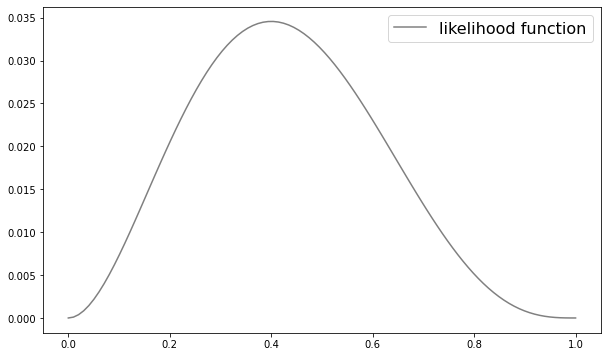

In [37]:
# p를 0에서 1로 변화시킬 때의 우도함수
ps = np.linspace(0,1,100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

* 우도함수는 p=0.4일 때 최대가 되는 거 같음 $\rightarrow$ 관측값에 의해 p=0.4가 가장 그럴 듯한 모수라는 뜻
* 관측값에서 가장 그럴 듯하다는 이유로 모수 $p$를 추정하는 방법 = 최우추정법(method of maximum likelihood)
  - 최우추정법에 의해 추측되는 추정량 = 최우추정량(maximum likelihood estimator), 그 추정값 = 최우추정값(maximum likelihood estimate)
* $f(x)$가 이산형 확률변수에서는 확률함수, 연속형 확률변수에서는 확률밀도함수라고 할 떄,
  - $L = \prod_{i=1} f(x_i)$
* 우도는 확률의 곱이 되므로 곱하면 곱할수록 0에 가까워짐
  - 이와 같은 작은 값은 손으로도, 컴퓨터로도 다루기 힘듦 $\rightarrow$ 우도에 로그를 취한 로그우도(log-likelihood)가 대신 사용되기도 함
  - $\log{L} = {\sum_{i=1} \log{f(x_i)}}$
* 우도함수가 최대로 될 때 로그우도함수도 최대가 되므로, 최우추정은 로그우도함수가 최대가 될 때의 파라미터로서 구할 수 있음
  - 그 때의 로그우도의 값을 최대로그우도(maximum log-likelihood)라고 함

In [38]:
# 동전의 최대로그우도 구하기
# p의 최우추정값은 0.4였으므로 p=0.4일 때 로그우도는 최대로그우도가 됨
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0,1,0,0,1])))
mll

-3.365058335046282

* 다시 회귀분석으로 돌아와서...
  - 단순회귀모형에서 $Y_i \sim N({{\beta_0} + {\beta_1 x_1}}, {\sigma^2})$이라고 가정했을 때
  - 이 가정을 토대로 관측값 $(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)$에 대한 최대로그우도는 모형의 데이터에 대한 적합이 좋다는 것을 나타낸다고 생각할 수 있음
  - 최대로그우도는 분석 결과의 Log-likelihood에 출력됨
* 단순회귀모형의 최대로그우도
  - 단순회귀모형에서 ${\beta_0},{\beta_1},{\sigma^2}$의 최우추정량은 각각 ${\hat{\beta_0}},{\hat{\beta_1}},{{1 \over n}\sum_{i=1}^n {\hat{\epsilon_i}}}$가 됨
  - 최대로그우도는 파라미터를 최우추정량으로 했을 때의 관측값의 로그우도였으므로 최대로그우도는 $N({\hat{y}},{{1 \over n}\sum_{i=1}^n {\hat{\epsilon_i}}}$의 밀도함수를 $f(x)$로 하여 $\sum_{i=1}^n {\log{f(y_i)}}$가 됨

In [39]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll # 최대로그우도 역시 설명변수를 늘리면 값이 증가하는 특징이 있음

-76.32521428624038

* AIC
  - 로그우도는 모형의 적합도를 나타내지만 그 지표는 의미 없는 설명변수를 늘림으로써 값이 증가함
  - 그러므로 로그우도와 같이 적합도를 기준으로 하면 일반 성능이 나쁜 모형이 선택됨
  - 이 때문에 모형의 복잡도(설명변수의 수)와 데이터에 대한 적합도의 균형을 잡는 지표가 필요 $\rightarrow$ AIC
  - AIC는 일반적인 성능도 고려하여 넣은 지표이므로 예측이 좋은 것을 나타내는 지표라고 할 수 있음
  - AIC를 구하는 방식은 다양함, 그 중에서 statsmodels의 출력에 맞추어 정의하면 $\rightarrow$ $AIC = -2 \times 최대로그우도 + 2 \times 회귀계수의 수$
  - AIC는 최대로그우도에 회귀계수의 수를 페널티로 부가하여 무턱대고 설명변수를 늘린 모형이 좋은 모형으로 선택되지 않게끔 한다고 해석할 수 있음

In [40]:
# AIC 구하기
aic = -2 * mll + 2 * (p+1)
aic

156.65042857248076

* AIC는 값이 작을수록 모형의 예측 정확도가 좋다고 생각할 수 있음

* BIC(Bayesian information criterion; 베이지안 정보 기준)
  - AIC와 유사함
  - 회귀계수의 수에 더해 표본 크기 n에 대해서도 페널티를 부과한 것
  - $BIC = -2 \times 최대로그우도 + \log{n} \times 회귀계수의 수$

In [41]:
# BIC 구하기
bic = -2 * mll + np.log(n) * (p+1)
bic

158.64189311958876

* BIC 역시 AIC와 같이 값이 작을수록 모형의 예측 정확도가 좋다고 생각할 수 있음

#### 4. 모형의 타당성
* 모형의 타당성: 처음에 회귀분석에 관해서 세운 '오차항 $\epsilon_i$는 서로 독립이고 $N(0,\sigma^2$을 따른다'라는 가정을 만족하고 있는지 여부를 체크하는 것
* 정규성 검정: 오차항 $\epsilon_i$가 $N(0,\sigma^2)$을 따른다는 가정이 타당했는지 알아보기 위해, 잔차 $\hat{\epsilon_i}$가 정규분포를 따르고 있는지를 확인하는 것
  - statsomdels에서는 정규성 검정으로 Omnibus 검정과 Jarque-Bera 검정이 사용됨
  - 정규성 검정은... 귀무가설: 잔차항은 정규분포를 따른다 / 대립가설: 잔차항은 정규분포를 따르지 않는다 ... 라는 가설검정 수행
  - 이러한 검정의 p값인 Prob(Omnibus)나 Prob(JB)가 유의수준인 0.05보다 크면 문제될 게 없음
  - Skew: 왜도, Kurtosis: 첨도 $\rightarrow$ 평균이나 분산과 마찬가지로 데이터의 특징을 나타내는 지표
  - 왜도와 첨도를 통해 정규성을 확인할 수 있음
  - 왜도(skewness): 분포의 좌우대칭을 측정하는 지표 $\rightarrow$ $\sum_i^n({{x-\bar{x}} \over {S}})^3$
    + 왜도는 정규분포와 같이 좌우대칭인 분포이면 0이 되고, 카이제곱분포와 같이 왼쪽으로 치우친 분포이면 0보다 크고, 반대로 오른쪽으로 치우친 분포일 때에는 0보다 작은 값이 됨
    + stats.skew로 계산할 수 있음
  - 첨도(kurtosis): 분포의 뽀족한 정도를 측정하는 지표 $\rightarrow$ $\sum_i^n({{x-\bar{x}} \over {S}})^4$
    + 첨도는 정규분포일 때 3이 되고, 정규분포보다 뾰족한 정점을 가진 분포라면 3보다 크고, 정규분포보다 둥근 정점을 가진 분포라면 3보다 작은 값이 됨
    + stats.kurtosis의 인수 fisher를 False로 함으로써 정의할 수 있음
* 더빈-왓슨비(Durbin-Watson ratio): 다른 오차항이 서로 무상관인지 여부를 체크하는 지표
  - 다루고 있는 데이터가 시계열 데이터인 경우에 특히 중요
  - $\sum_{i=2}^n({{\hat{\epsilon_i} - {\hat{\epsilon_{i-1}}}}})^2 \over {\sum_{i=1}^n{\hat{\epsilon_i}}^2}$
  - 더빈-왓슨비는 0부터 4의 값이 되고, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관, 2 앞뒤의 값이면 무상관이라고 판단
* 다중공선성: 조건수(Cond. No.)로 체크
  - 조건수의 값이 크면 다중공선성과 설명변수 사이에 강한 상관이 생겼다는 것을 의미
  - 다중공선성이 크면 회귀계수의 분산이 커져 모형의 예측 결과가 나빠진다고 알려져 있음

In [42]:
# 앞전에 AIC를 기준으로 좋은 모형이라고 판단된 모형 (설명변수에 쪽지 시험과 수면 시간을 사용한 중회귀모형의 결과를 사용함)
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           6.19e-06
Time:                        20:15:57   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 오차항 $\epsilon_i$에 관한 체크이므로, 분석 대상이 되는 것은 잔차 $\hat{\epsilon_i}$임

In [43]:
eps_hat = np.array(result.resid)
eps_hat

array([ 11.689,  -6.531,  -1.345, -10.919,  -4.21 ,   4.228,  -5.368,
        -1.235,  -4.546,  -9.283,  -3.574,   3.619, -14.682,   7.727,
        18.439,  13.581,  -1.215,  -9.73 ,  -6.316,  19.671])

In [44]:
# 왜도
stats.skew(eps_hat)

0.660

In [45]:
# 첨도
stats.kurtosis(eps_hat, fisher=False)

2.437

In [46]:
# 더빈-왓슨비
np.sum(np.diff(eps_hat,1)**2) / np.sum(eps_hat**2)

1.5082185264423011

In [47]:
# 다중공선성
# 쪽지 시험의 결과의 2배인 중간고사라는 변수를 추가
# 쪽지 시험과 중간고사의 상관관계는 1이 되고 이 데이터는 큰 다중공선성을 가짐
df['mid_test'] = df['quiz']*2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [48]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           8.59e-06
Time:                        20:15:57   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.30e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* 조건수가 매우 큰 값이 됨
  - 이처럼 다중공선성이 생기면 조건수는 매우 큰 값이 됨
  - 조건수가 꽤 큰 값이 되어 있을 때는 다중공선성을 의심해보는 것이 좋음
  - 그 경우에는 설명변수 중에서 한쪽 변수를 모형에서 제외하는 것을 해결책으로 생각할 수 있음